# Лабораторная работа №3
### Оценивание параметров нелинейного объекта методом наименьших квадратов

Уравнение исследуемого в лабораторной работе объекта имеет вид:
    \begin{equation}y=f(t,A,B,C,D,E)=A\exp(Bt)\cos(Ct+D)+E+\eta\end{equation}
Уравнение модели объекта:
    \begin{equation}\tilde{y}=\tilde{A}\exp(\tilde{B}t)\cos(\tilde{C}t+\tilde{D})+\tilde{E}\end{equation}
Видно, что объект нелинеен по параметрам $A,B,C,D,E$. 
Данные параметры подлежат оцениванию, $t$ — единственная предикторная переменная, а $\eta$ — случайная ошибка, удовлетворяющая
обычным предположениям: $ E(\eta) = 0, D(\eta)= \sigma^2 $.

Найти оценки параметров $A,B,C,D,E$ предлагается с помощью применения МНК к линеаризованному объекту.

Для линеаризации объекта нужны частные производные от уравнения модели объекта по каждому из параметров. 

Вычислите эти частные производные и запишите уравнение модели линеаризованного объекта:

$$\frac{\partial y}{\partial A} = ... $$
$$\frac{\partial y}{\partial B} = ... $$ 
$$\frac{\partial y}{\partial C} = ... $$
$$\frac{\partial y}{\partial D} = ... $$
$$\frac{\partial y}{\partial E} = ... $$

$$y= ... $$

Теперь перейдем к обработке измерений, полученных c объекта.
Подключим необходимые для работы библиотеки и считаем данные из файла с измерениями.

In [25]:
import numpy as np
import csv

In [26]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
import pandas as pd

In [28]:
filename='Ognyanovich_1_norm.csv'

In [29]:
data = pd.read_csv(filename, sep=';',header=None, names=['t', 'U'])

In [30]:
#Если необходимо перевести время в другую единицу измерения
#data['t']=data['t']/1000 # перевод колонки t в мсек

Построим зависимость измеpений от времени:

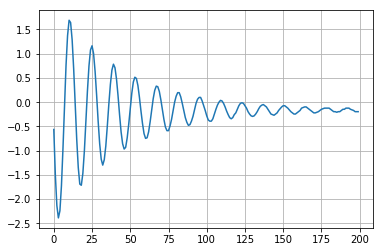

In [31]:
plt.plot(data.t,data.U)
plt.grid(True)

Исходя из графика и уравнения объекта, подберите начальное приближение:
$A_{0},B_{0},C_{0},D_{0},E_{0}$

ПРИМЕЧАНИЕ: если в процессе оценивания параметров МНК разойдется, то возможно стоит выбрать более точное начальное приближение.

In [32]:
#Ваш код здесь
A_0 = 2.2
B_0 = 6*3.14/43
C_0 = 3.14/2
D_0 = -0.02
E_0 = -0.2

Определите функции, возвращающие значения частных производных:

In [33]:
# from sympy import *
# import numpy as np

# A,B,C,D,E,t,n= symbols('A B C D E t n')
# y=A*cos(B*t+C)*exp(D*t)+E

# def dFdA():
#     print(y.diff(A))
#     return y.diff(A)
# def dFdB():
#     print(y.diff(B))
#     return y.diff(B)
# def dFdC():
#     print(y.diff(C))
#     return y.diff(C)
# def dFdD():
#     print(y.diff(D))
#     return y.diff(D)
# def dFdE():
#     print(y.diff(E))
#     return y.diff(E)
#Ваш код здесь
def dFdA(t, A_0, B_0, C_0, D_0, E_0):
    y_A=np.exp(D_0*t)*np.cos(B_0*t+C_0)
    return y_A

def dFdB(t, A_0, B_0, C_0, D_0, E_0):
    y_B=-A_0*t*np.exp(D_0*t)*np.sin(B_0*t+C_0)
    return y_B

def dFdC(t, A_0, B_0, C_0, D_0, E_0):
    y_C=-A_0*np.exp(D_0*t)*np.sin(B_0*t+C_0)
    return y_C

def dFdD(t, A_0, B_0, C_0, D_0, E_0):
    y_D=A_0*t*np.exp(D_0*t)*np.cos(B_0*t+C_0)
    return y_D

def dFdE(t, A_0, B_0, C_0, D_0, E_0):
    y_E=1
    return y_E 


Реализуйте МНК для линеаризованного объекта и найдите оценку параметров: $\tilde{A},\tilde{B},\tilde{C},\tilde{D},\tilde{E}$

In [34]:
Q_j = numpy.array(range(5), dtype = np.double)
Q_j.shape = (5,1) 
Q_j1 = numpy.array(range(5), dtype = np.double)
Q_j1.shape = (5,1) 
Y_f=numpy.array(range(200), dtype = np.double)
Y_f.shape=(200,1)
SS=numpy.array(range(200), dtype = np.double)
SS.shape=(200,1)
Beta_opt = numpy.array(range(5), dtype = np.double)
Beta_opt.shape = (5,1)

Q_j1[0]=A_0
Q_j1[1]=B_0
Q_j1[2]=C_0
Q_j1[3]=D_0
Q_j1[4]=E_0
Q_j[0]=13
Q_j[1]=13
Q_j[2]=13
Q_j[3]=13
Q_j[4]=13
i=0
j=0
S=0
with open(filename, 'r') as fp:
    reader = csv.reader(fp, delimiter=',', quotechar='"')
    data_read = [row for row in reader]
    while (np.abs(Q_j1[0]-Q_j[0])>0.00001) and (np.abs(Q_j1[1]-Q_j[1])>0.00001) and (np.abs(Q_j1[2]-Q_j[2])>0.00001) and (np.abs(Q_j1[3]-Q_j[3])>0.00001) and (np.abs(Q_j1[4]-Q_j[4])>0.00001):
        Z = numpy.array(range(1000), dtype = np.double)
        Z.shape = (200,5) 
        Q_j[0]=Q_j1[0]
        Q_j[1]=Q_j1[1]
        Q_j[2]=Q_j1[2]
        Q_j[3]=Q_j1[3]
        Q_j[4]=Q_j1[4]
        # Задаем матрицу Z
        for i in range(200):
#             print("i=", i)
            t = float(data_read[i][0].partition(";")[0])
#             print("t=", t)
            Y = float(data_read[i][0].partition(";")[2])
#             print("Y=", Y)
            Y_f[i] = Y - Q_j[0]*np.exp(Q_j[3]*t)*np.cos(Q_j[1]*t+Q_j[2])-Q_j[4] 
            SS[i]=Y_f[i]*Y_f[i]
            S=S+SS[i]
#             print("Разница = ", Y_f[i])
            # Матрица Z
            Z[i][0]= dFdA(t, Q_j[0], Q_j[1], Q_j[2], Q_j[3], Q_j[4])
            Z[i][1]= dFdB(t, Q_j[0], Q_j[1], Q_j[2], Q_j[3], Q_j[4])
            Z[i][2]= dFdC(t, Q_j[0], Q_j[1], Q_j[2], Q_j[3], Q_j[4])
            Z[i][3]= dFdD(t, Q_j[0], Q_j[1], Q_j[2], Q_j[3], Q_j[4])
            Z[i][4]= dFdE(t, Q_j[0], Q_j[1], Q_j[2], Q_j[3], Q_j[4])
            i = i + 1
        R=np.eye(200)
        Z = np.asmatrix(Z)
        Beta_opt =(Z.getT()*R*Z).getI()*Z.getT()*R*Y_f
        Q_j1[0]=Q_j[0]+Beta_opt[0]
        Q_j1[1]=Q_j[1]+Beta_opt[1]
        Q_j1[2]=Q_j[2]+Beta_opt[2]
        Q_j1[3]=Q_j[3]+Beta_opt[3]
        Q_j1[4]=Q_j[4]+Beta_opt[4]
        j=j+1
    print("Количество итераций = ", j)
    print("Сумма квадратов ошибок = ", S) 
    print("Начальный параметр A = "+ str(A_0)+"       Новый параметр = "+str(Q_j1[0]))
    print("Начальный параметр B = "+ str(B_0)+"       Новый параметр = "+str(Q_j1[1]))
    print("Начальный параметр C = "+ str(C_0)+"       Новый параметр = "+str(Q_j1[2]))
    print("Начальный параметр D = "+ str(D_0)+"       Новый параметр = "+str(Q_j1[3]))
    print("Начальный параметр E = "+ str(E_0)+"       Новый параметр = "+str(Q_j1[4]))

Количество итераций =  4
Сумма квадратов ошибок =  [4.66805024]
Начальный параметр A = 2.2       Новый параметр = [2.42782652]
Начальный параметр B = 0.4381395348837209       Новый параметр = [0.44100006]
Начальный параметр C = 1.57       Новый параметр = [1.6383663]
Начальный параметр D = -0.02       Новый параметр = [-0.02388079]
Начальный параметр E = -0.2       Новый параметр = [-0.16615771]


Постройте графики для исходных измерений и полученной модели объекта:

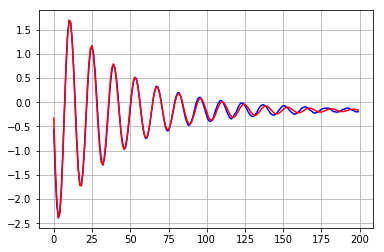

In [39]:
#График для исходных измерений
data = pd.read_csv(filename, sep=';',header=None, names=['t', 'U'])
plt.plot(data.t,data.U, color='b')
plt.grid(True)

#График для полученной модели
y = numpy.array(range(200), dtype = np.double)
y.shape = (200,1) 
i=0
for i in range(200):
    y[i]=Q_j1[0]*np.exp(Q_j1[3]*i)*np.cos(Q_j1[1]*i+Q_j1[2])+ Q_j1[4]
    i=i+1
plt.plot(data.t,y, color='r')
plt.grid(True)

Постройте график остатков и сделайте выводы о применимости линеаризации для оценки параметров нелинейных объектов:

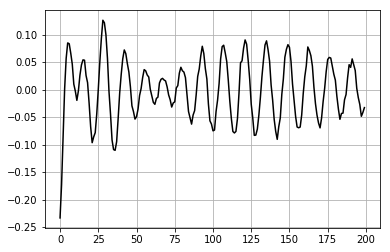

In [36]:
#Ваш код здесь
plt.plot(data.t,Y_f, color='k')
plt.grid(True)
# plt.plot(data.t,SS, color='r')
# plt.grid(True)

**После выполнения лабораторной работы необходимо написать краткий отчет, который должен включать в себя:**
    - титульный лист
    - описание моделируемого объекта
    - математические выкладки о применении МНК для оценки параметров моделируемого объекта
    - выводы о применимости линеаризации для оценки параметров нелинейных объектов